In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dropout,Dense,BatchNormalization

In [2]:
import os

x_train=[]
y_train=[]
x_test=[]
y_test=[]

path_train_low='../dataSets/ref/our485/low/'
path_train_high='../dataSets/ref/our485/high/'
path_test_low='../dataSets/ref/eval15/low/'
path_test_high='../dataSets/ref/eval15/high/'

print('\nLoding Train dataset :')
i=0;
for img in os.listdir(path_train_low):
    img_low_path=os.path.join(path_train_low, img)
    img_high_path=os.path.join(path_train_high, img)
    
    img_low=load_img(img_low_path, target_size=(256, 256))
    img_low=img_to_array(img_low)/255.
    
    i=i+1
    print("{:.2f}".format(i/4.85)+' %',end='\r')
    
    img_high=load_img(img_high_path, target_size=(256,256))
    img_high=img_to_array(img_high)/255.
    
    x_train.append(img_low)
    y_train.append(img_high)
    
print('\nLoding Test dataset :')
i=0;
for img in os.listdir(path_test_low):
    img_low_path=os.path.join(path_test_low, img)
    img_high_path=os.path.join(path_test_high, img)
    
    img_low=load_img(img_low_path, target_size=(256, 256))
    img_low=img_to_array(img_low)/255.
    
    i=i+1
    print("{:.2f}".format(i/0.15)+' %',end='\r')
    
    img_high=load_img(img_high_path, target_size=(256, 256))
    img_high=img_to_array(img_high)/255.
    
    x_test.append(img_low)
    y_test.append(img_high)

x_train=np.array(x_train, dtype="float32")
y_train=np.array(y_train, dtype="float32")

x_test=np.array(x_test, dtype="float32")
y_test=np.array(y_test, dtype="float32")


Loding Train dataset :
100.00 %
Loding Test dataset :


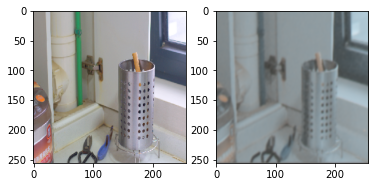

In [3]:
model=keras.models.load_model('models/ref/ref_cnn.h5');

fig=plt.figure();

def check_result(n):
    fig.add_subplot(1,2,1).imshow(y_test[n])
    fig.add_subplot(1,2,2).imshow(model.predict(x_test)[n])

check_result(1)

Below 'histogram equalizer' and 'adaptive histogram equalizer' aren't the best way to produce the desired results.

In [4]:
import cv2

#img=cv2.imread('../dataSets/pic2.jpeg')
img=np.array(model.predict(x_test)[1]*255,dtype=np.uint8)
R,G,B=cv2.split(img)

# equ_R=cv2.equalizeHist(R)
# equ_G=cv2.equalizeHist(G)
# equ_B=cv2.equalizeHist(B)

clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(10,10))
equ_R = clahe.apply(R)
equ_G = clahe.apply(G)
equ_B = clahe.apply(B)

equ=cv2.merge((equ_R,equ_G,equ_B))

res = np.hstack((img,equ))

cv2.imshow('img',res)
cv2.waitKey(5000)
cv2.destroyWindow('img')